In [30]:
import pandas as pd

# Performing on add.csv

In [31]:
data = pd.read_csv('add.csv', index_col=0)
data.head()

/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_1422/2703976675.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('add.csv', index_col=0)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [32]:
# data preprocessing

# stripping whitespaces
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [33]:
# convert categorical data to numerical data
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,23,25,103,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,167,469,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102,105,448,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,133,167,461,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,133,167,461,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# interpolating '?' values
data = data.replace('?', pd.np.nan)
data = data.astype(float)
data = data.interpolate()
data = data.round(2)
data.head()

/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_1422/3375152242.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data = data.replace('?', pd.np.nan)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,23.0,25.0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,130.0,167.0,469.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102.0,105.0,448.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,133.0,167.0,461.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,133.0,167.0,461.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Implementing algorithms

In [35]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop('1558', axis=1)
y = data['1558']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# impelement decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9506578947368421


In [37]:
# implementing naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7664473684210527


In [38]:
# implementing KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9210526315789473


In [39]:
# implementing SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.756578947368421


# Working on healthcare data

In [40]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
# perform data preprocessing
data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_1422/4027767241.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


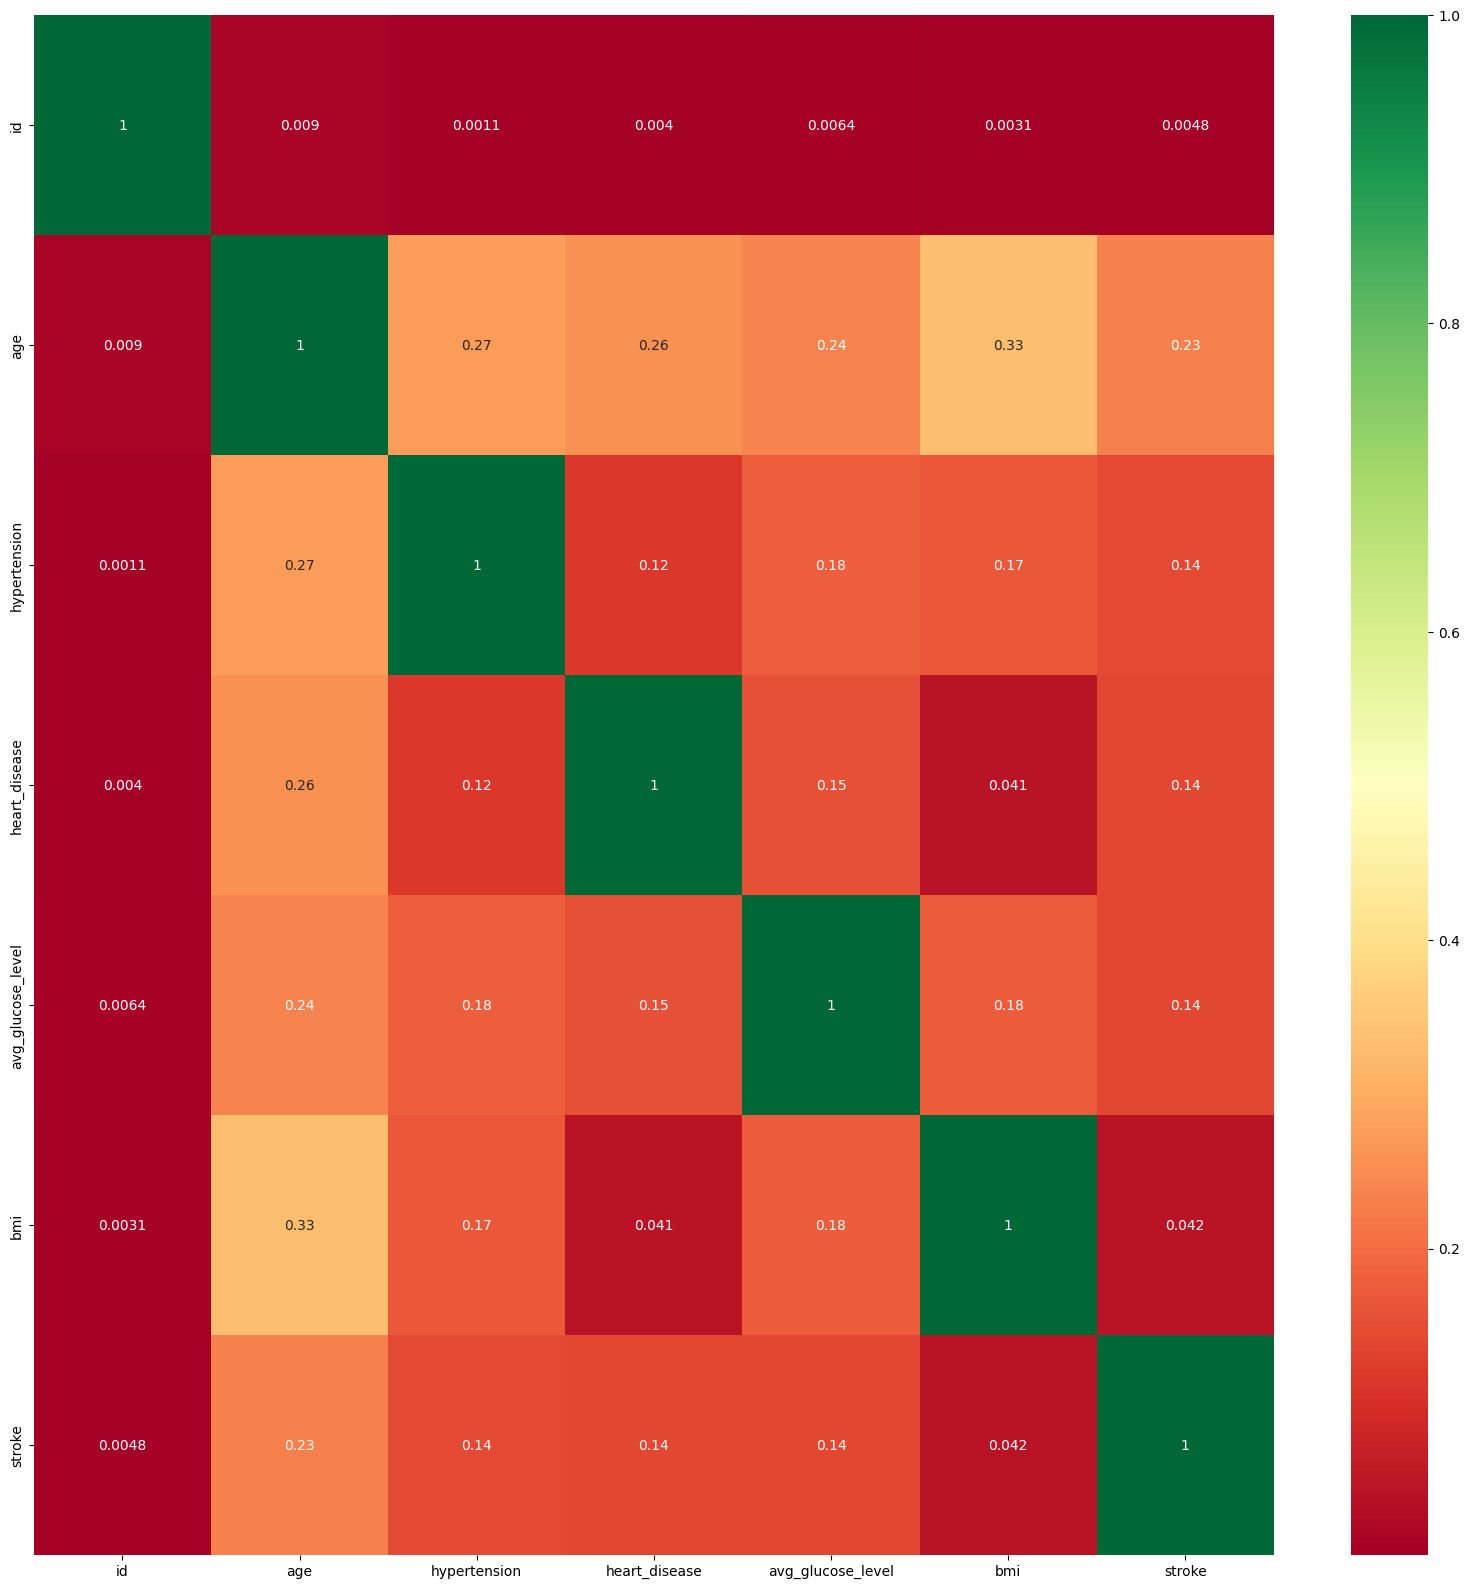

In [42]:
# visualizing correlation between features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [43]:
# droppeing id column
data = data.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [44]:
# convert categorical data to numerical data
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Implementing algorithms

In [45]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# impelement decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.924643584521385


In [47]:
# implementing naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8767820773930753


In [48]:
# implementing KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9327902240325866


In [49]:
# implementing SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9460285132382892
